In [17]:
import pandas as pd
import numpy as np

In [18]:
PATH = "insurance.csv"

In [19]:
df = pd.read_csv(PATH) 

In [20]:
df.head() 

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [5]:
# checking column names
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
# checking column data types
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# checking is there any  null values
df.isnull().sum() 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Analysing Features-Univariate
##### Non Viz
- Min
- Max
- Central Tendency
- Percentiles
- Dispersion

##### Viz
- Plot of Dist- Distribution
- Plot of box plot - Outlier

## Analysing Age feature -Univariate

In [8]:
# Non-vizualisation statistical analysis
print("min of age:",df["age"].min())
print("max of age:",df["age"].max())
print("mean of age:",df["age"].mean())
print("median of age:",df["age"].median())
print("standard deviation of age:",df["age"].std())

min of age: 18
max of age: 64
mean of age: 39.20702541106129
median of age: 39.0
standard deviation of age: 14.049960379216172


<AxesSubplot:ylabel='Density'>

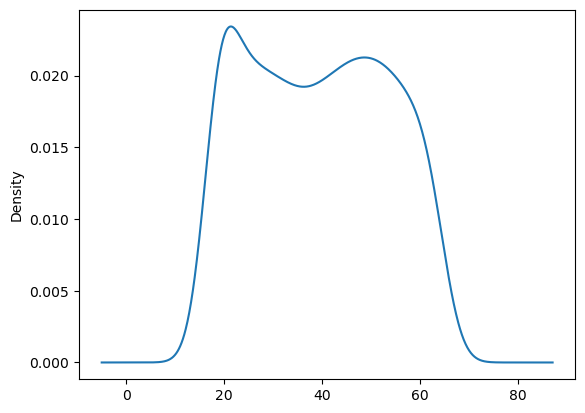

In [9]:
# plotting the distribution for age column
df["age"].plot(kind="kde") 

<AxesSubplot:>

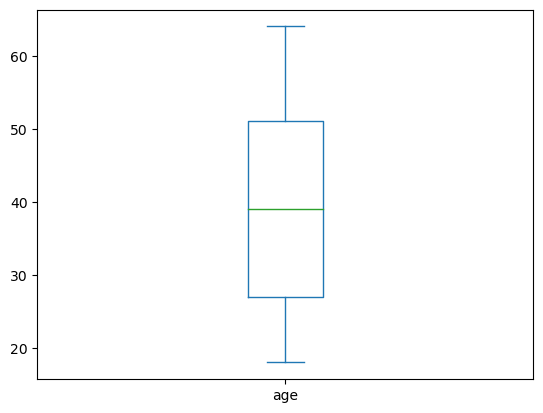

In [10]:
# detecting outliers in age column using box column
df["age"].plot(kind="box") 

In [11]:
from scipy import stats
import matplotlib.pyplot as plt 

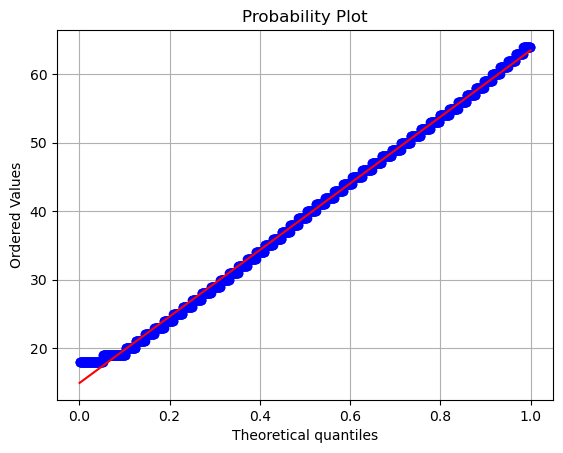

In [12]:
# QQ plot for age column to check which type of distribution it is
stats.probplot(df["age"],dist="uniform",plot=plt)
plt.grid() 

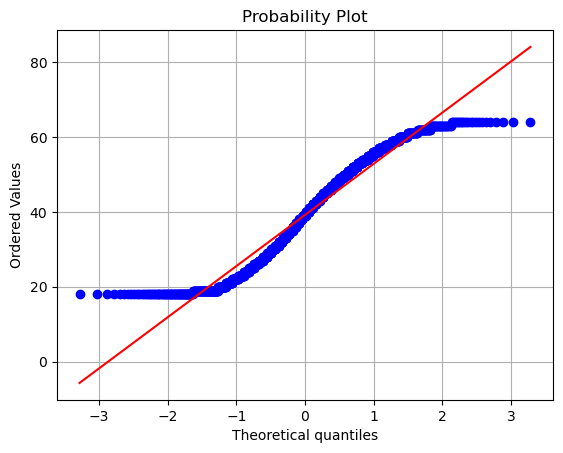

In [13]:
# QQ plot for age column to check distribution for age column
stats.probplot(df["age"],dist="norm",plot=plt)
plt.grid() 

In [ ]:
-- Age column follows uniform distribution.

# Analysing bmi feature - Univariate 

In [14]:
# Non vizulaisation statistical Analysis
print("min of bmi:",df["bmi"].min())
print("max of bmi:",df["bmi"].max())
print("mean of bmi:",df["bmi"].mean())
print("median of bmi:",df["bmi"].median())
print("standard deviation of bmi:",df["bmi"].std())

min of bmi: 15.96
max of bmi: 53.13
mean of bmi: 30.663396860986538
median of bmi: 30.4
standard deviation of bmi: 6.098186911679017


<AxesSubplot:ylabel='Density'>

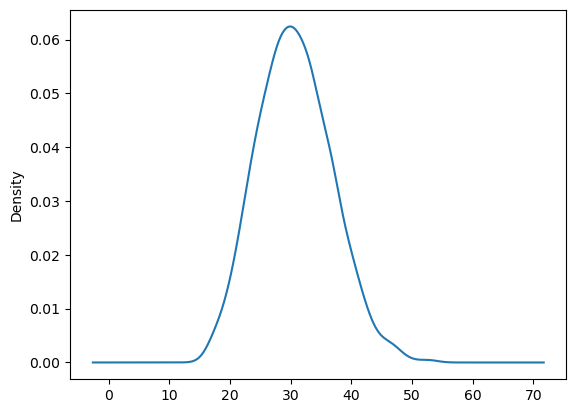

In [15]:
# Distribution plot for Bmi column
df["bmi"].plot(kind="kde") 

<AxesSubplot:>

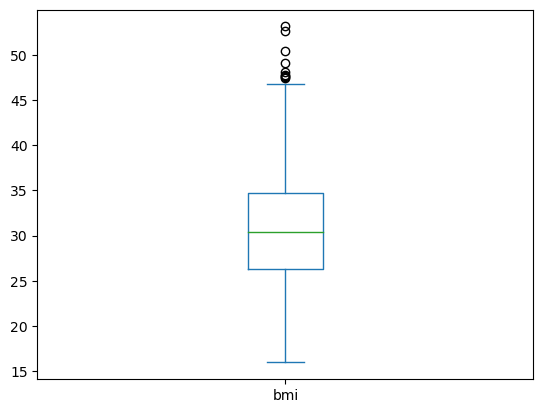

In [16]:
# Detecting outliers in bmi column using box plot
df["bmi"].plot(kind="box")

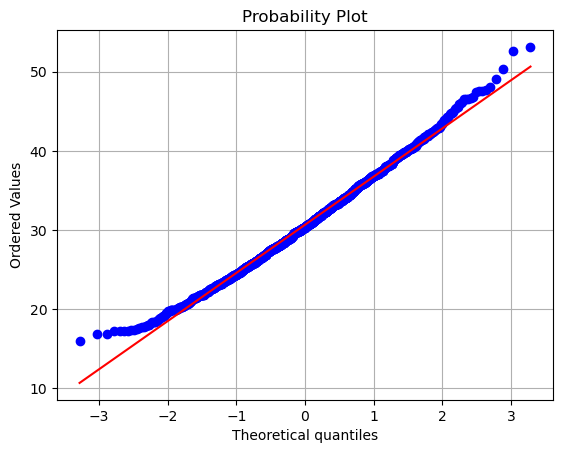

In [17]:
# QQ plot for bmi column to check which type of distribution it follows
stats.probplot(df["bmi"],dist="norm",plot=plt)
plt.grid() 

In [21]:
# removing outliers using IQR
bmi_q1 = df["bmi"].quantile(0.25)
bmi_q3 = df["bmi"].quantile(0.75)

IQR = bmi_q3 - bmi_q1
bmi_lower_bound = bmi_q1 - 1.5* IQR
bmi_upper_bound = bmi_q3 + 1.5* IQR

clean_df = df[(df["bmi"]>bmi_lower_bound) & (df["bmi"]<bmi_upper_bound)] 

In [19]:
# checking no.of columns after removing outliers
clean_df.shape

(1329, 7)

<AxesSubplot:ylabel='Density'>

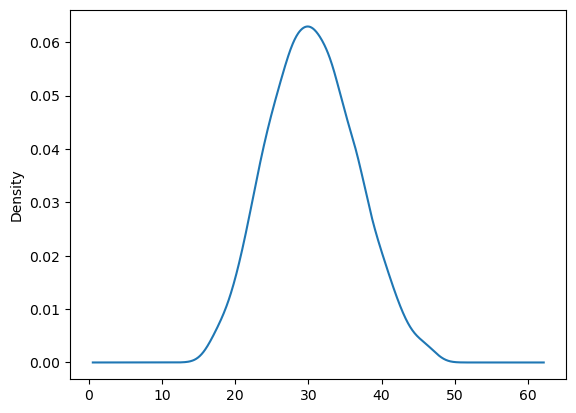

In [20]:
# The distribution plot for bmi column after removing outliers
clean_df["bmi"].plot(kind="kde") 

<AxesSubplot:>

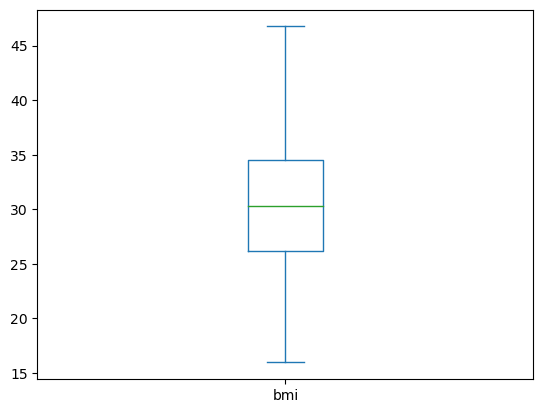

In [21]:
# checking whether outliers is there or not after using IQR method.
clean_df["bmi"].plot(kind="box") 

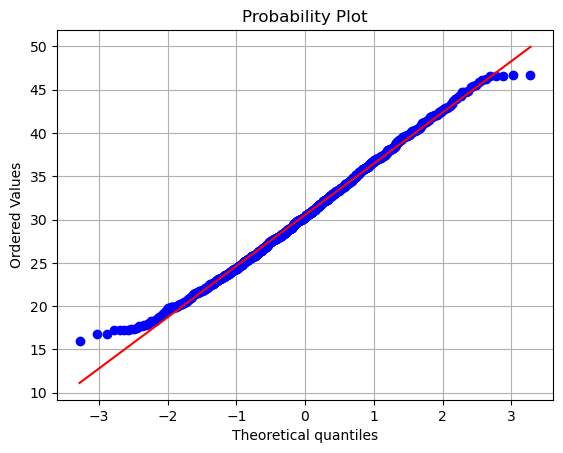

In [22]:
# QQ plot after removing outliers for bmi column
stats.probplot(clean_df["bmi"],dist="norm",plot=plt)
plt.grid() 

# Analysing childern feature - Univariate

In [23]:
# Non visulaization analysis for children colum
print("min of childern:",df["children"].min())
print("max of childern:",df["children"].max())
print("mean of childern:",df["children"].mean())
print("median of childern:",df["children"].median())
print("std of childern:",df["children"].std())   

min of childern: 0
max of childern: 5
mean of childern: 1.0949177877429
median of childern: 1.0
std of childern: 1.2054927397819095


<AxesSubplot:ylabel='Density'>

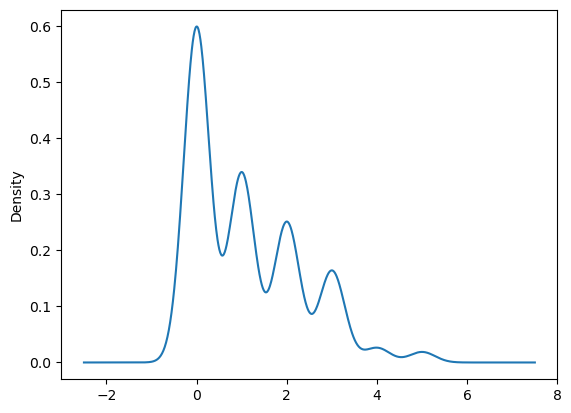

In [24]:
# distribution plot for chidren column
df["children"].plot(kind = "kde")  

<AxesSubplot:>

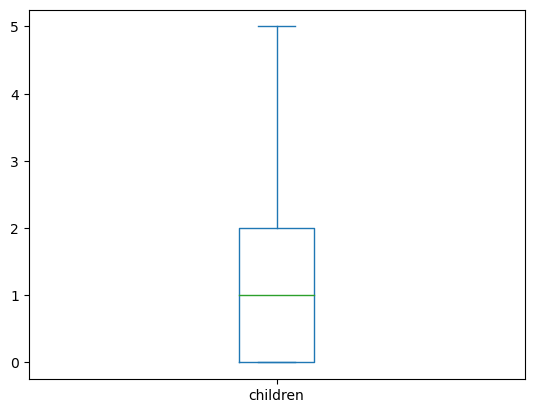

In [25]:
# checking outliers in the children column using box plot
df["children"].plot(kind = "box") 

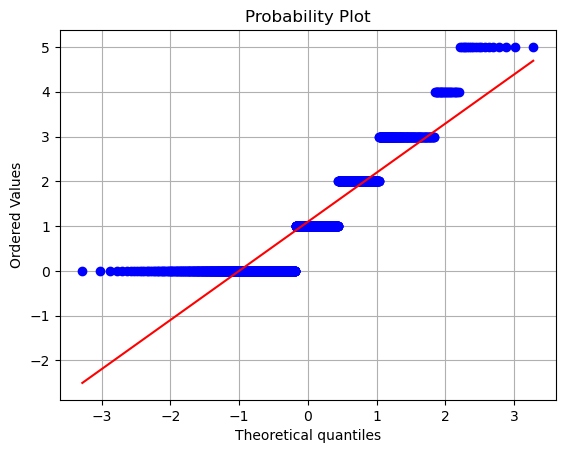

In [26]:
# QQ plot for children column 
stats.probplot(df["children"],dist="norm",plot=plt)
plt.grid() 

# Analysing charges feature-Univarite

In [27]:
# Non visulaization analysis for charges column
print("min of charges:",df["charges"].min())
print("max of charges:",df["charges"].max())
print("mean of charges:",df["charges"].mean())
print("median of charges:",df["charges"].median())
print("standard deviation of charges:",df["charges"].std()) 

min of charges: 1121.8739
max of charges: 63770.42801
mean of charges: 13270.422265141257
median of charges: 9382.033
standard deviation of charges: 12110.011236693994


<AxesSubplot:ylabel='Density'>

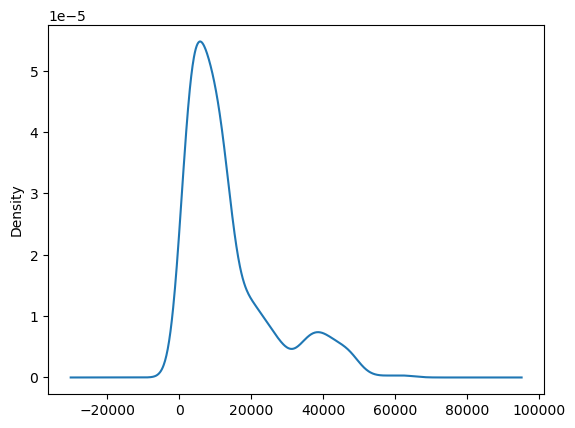

In [28]:
# Distribution plot for charges column
df["charges"].plot(kind="kde") 

<AxesSubplot:>

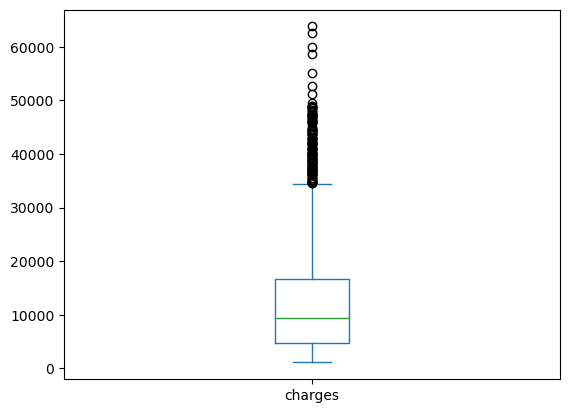

In [29]:
# Box plot for charges column 
df["charges"].plot(kind="box") 

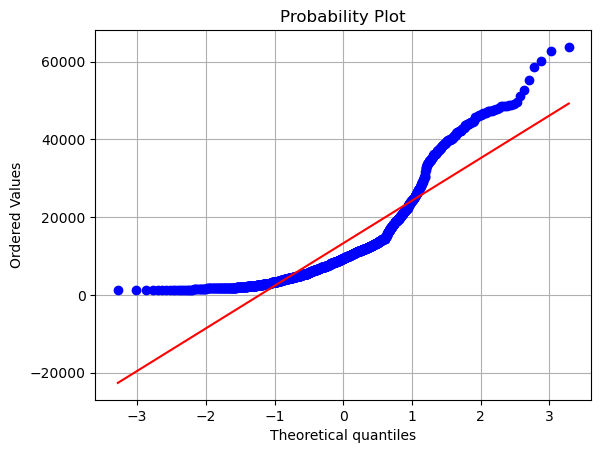

In [30]:
# QQ plot for charges column 
stats.probplot(df["charges"],dist="norm",plot=plt)
plt.grid() 

In [101]:
# removing outliers using log norm distributions
#clean_df["charges"] = np.log(df["charges"]) 

In [124]:
# # removing outliers using pareto distributions
# charges_transformed = stats.boxcox(clean_df["charges"])[0]
# l=stats.boxcox(clean_df["charges"])[1]
# clean_df["charges"] = charges_transformed
# print(l)  

0.9892198378273752


In [125]:
# # after applying log normal distribution
# print("min of charges:",clean_df["charges"].min())
# print("max of charges:",clean_df["charges"].max())
# print("mean of charges:",clean_df["charges"].mean())
# print("median of charges:",clean_df["charges"].median())
# print("standard deviation of charges:",clean_df["charges"].std())

min of charges: 5.536362426598092
max of charges: 10.55423197220197
mean of charges: 8.05621839076934
median of charges: 8.097395398489628
standard deviation of charges: 1.1436802588739308


# Analysing sex feature-Univariate

In [35]:
# getting column names
clean_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [36]:
# getting value counts
clean_df['sex'].value_counts() 

male      670
female    659
Name: sex, dtype: int64

In [37]:
# getting value_counts by normalization.
clean_df['sex'].value_counts(normalize=True)

male      0.504138
female    0.495862
Name: sex, dtype: float64

<AxesSubplot:>

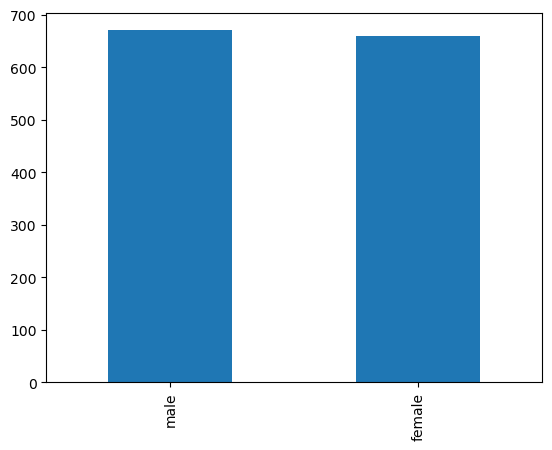

In [38]:
# bar plot for sex column
clean_df['sex'].value_counts().plot(kind="bar")  

# Analysing region feature-Univariate

In [39]:
# Non visualization for region column
clean_df['region'].value_counts() 

southeast    357
northwest    325
southwest    324
northeast    323
Name: region, dtype: int64

In [23]:
# applying value counts by normalization 
clean_df['region'].value_counts(normalize = True)

southeast    0.268623
northwest    0.244545
southwest    0.243792
northeast    0.243040
Name: region, dtype: float64

<AxesSubplot:>

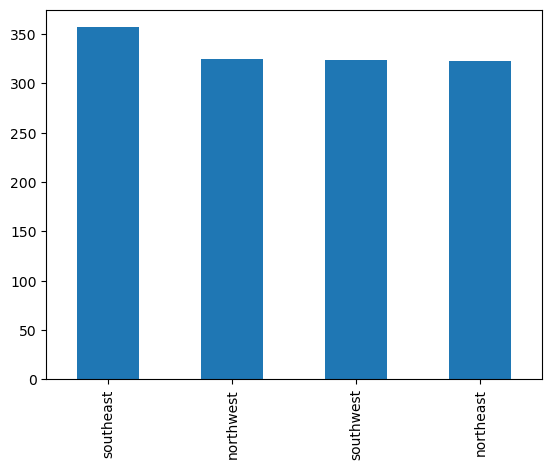

In [40]:
# bar  plot for region column
clean_df['region'].value_counts().plot(kind="bar") 

# Analysing smoker feature-Univariate

In [41]:
# applying value counts for smoker feature
clean_df['smoker'].value_counts() 

no     1058
yes     271
Name: smoker, dtype: int64

In [22]:
# applying value counts by normalization
clean_df['smoker'].value_counts(normalize = True) 

no     0.796087
yes    0.203913
Name: smoker, dtype: float64

<AxesSubplot:>

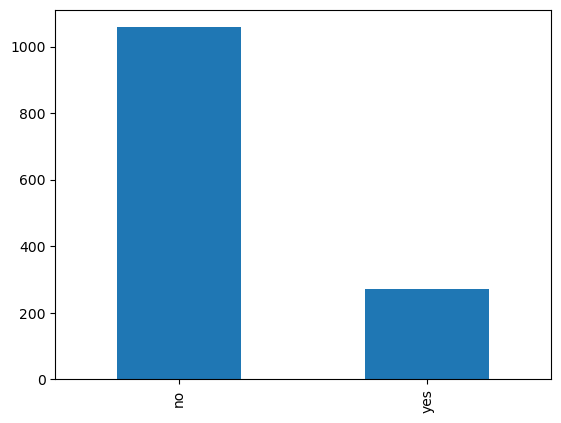

In [42]:
# plotting bar plot for smoker region
clean_df['smoker'].value_counts().plot(kind="bar")  

# Bivariate Analysis

# Analysing relationship between Numerical features

# relationship between Age and Charges

In [43]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

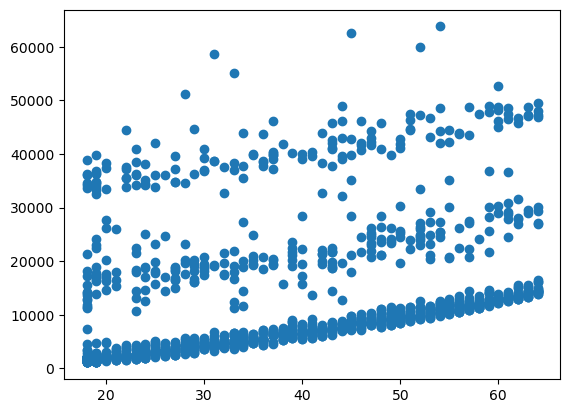

In [44]:
# Analising relationship between age and charges column using scatter plot(NUM vs NUM)
# Before cleaning the data
plt.scatter(x=df["age"],y=df["charges"])

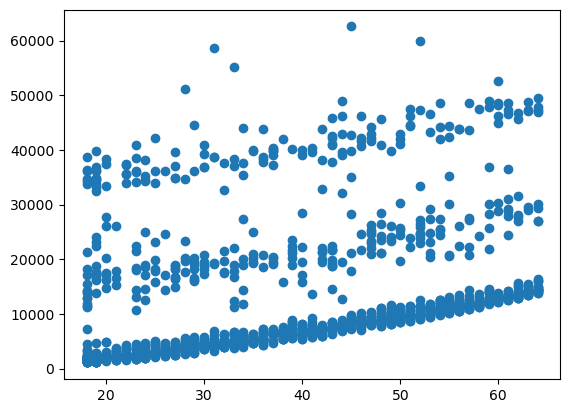

In [45]:
# After cleaning the data
plt.scatter(x=clean_df["age"],y=clean_df["charges"])

# Analysing relationship between bmi-body mass index vs charges

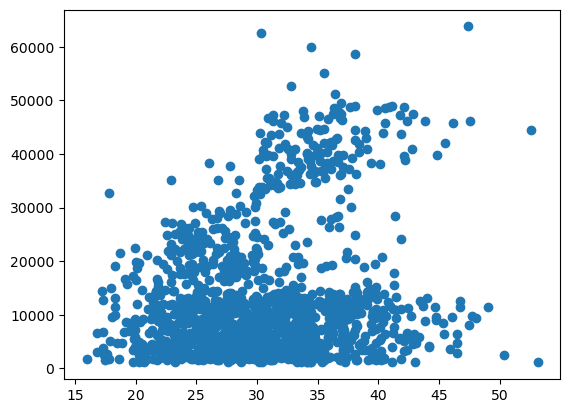

In [46]:
# Analysing relationship between bmi and charges (NUM vs NUM)
# Before cleaning data
plt.scatter(x=df["bmi"],y=df["charges"])

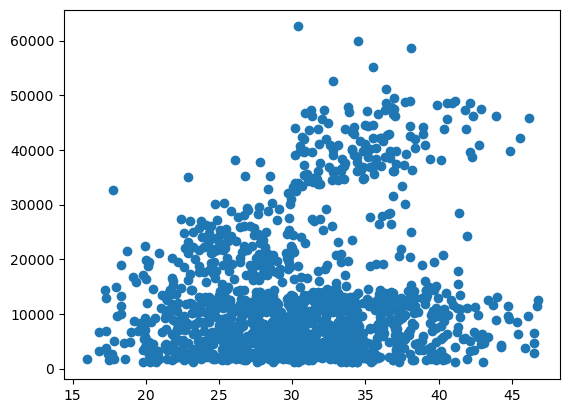

In [47]:
# After cleaning the data
plt.scatter(x=clean_df["bmi"],y=clean_df["charges"]) 

# Analysing relationship between childern and charges

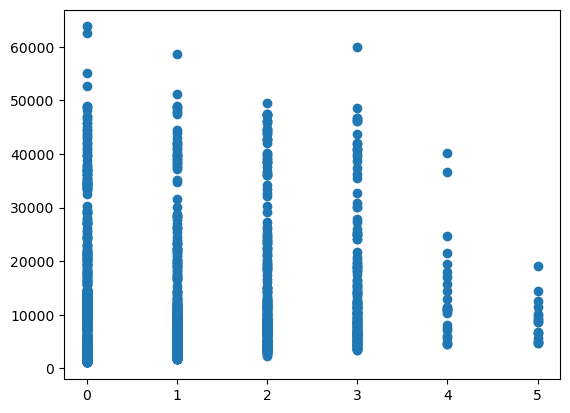

In [48]:
# Analysing  relationship between children and charges 
# Before deleting data
plt.scatter(x=df["children"],y=df["charges"])

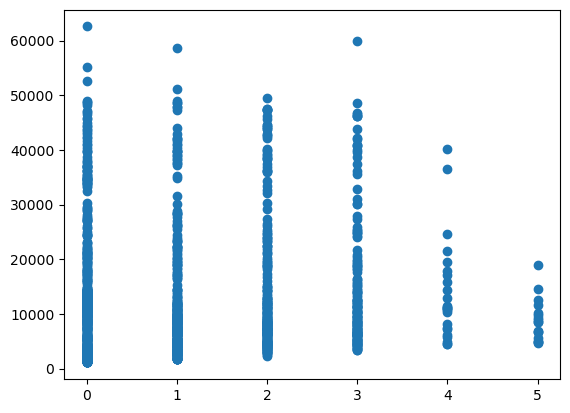

In [49]:
# After deleting the data
plt.scatter(x=clean_df["children"],y=clean_df["charges"])

# Analysing relationship between categorical features

###  Analysing relationship between sex and charges

<AxesSubplot:title={'center':'charges'}, xlabel='sex'>

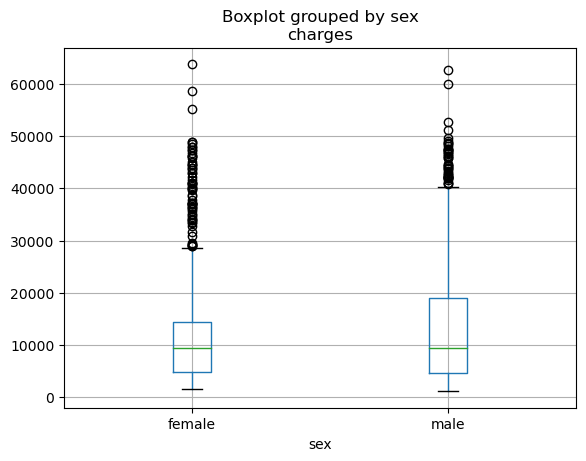

In [50]:
# applying box plot for sex and charges features 
# Before cleaning the data
df.boxplot(by="sex",column="charges")

<AxesSubplot:title={'center':'charges'}, xlabel='sex'>

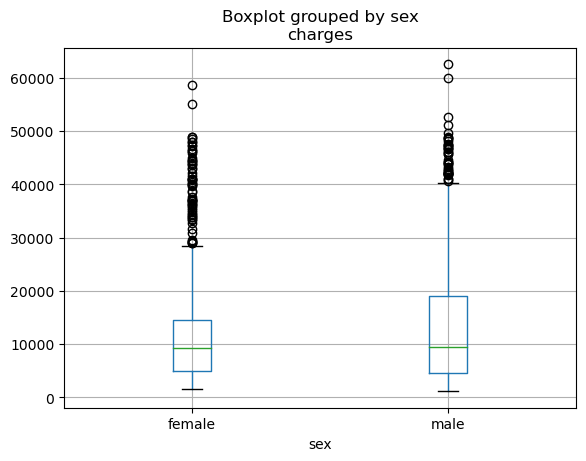

In [51]:
# after cleaning the data
clean_df.boxplot(by="sex",column="charges")

### Analysing realtionship between smoker vs charges

<AxesSubplot:title={'center':'charges'}, xlabel='smoker'>

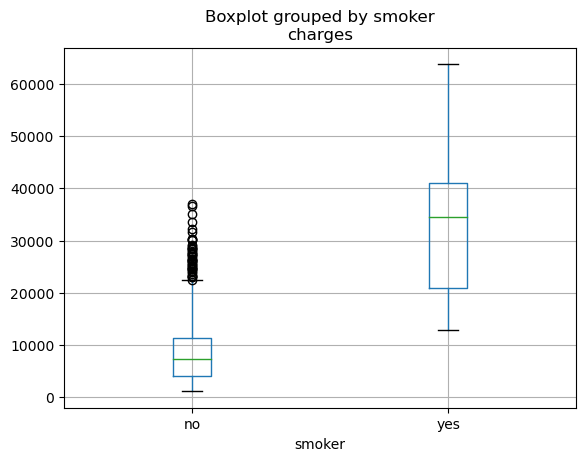

In [52]:
# plotting box plot for smoker and charges feature
# Before cleaning data
df.boxplot(by="smoker",column="charges")

<AxesSubplot:title={'center':'charges'}, xlabel='smoker'>

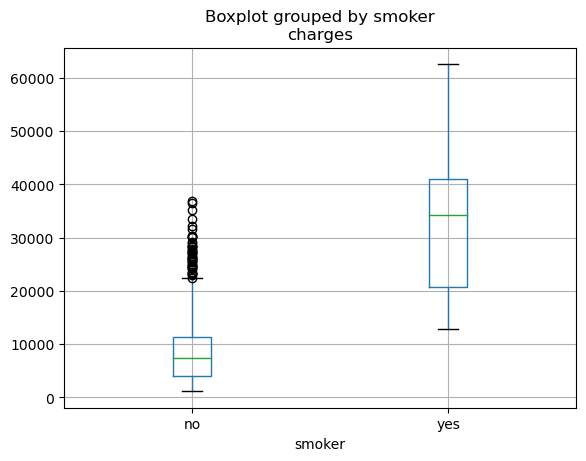

In [53]:
# After cleaning the data
clean_df.boxplot(by="smoker",column="charges")

## Analysing realtionship between region vs charges

<AxesSubplot:title={'center':'charges'}, xlabel='region'>

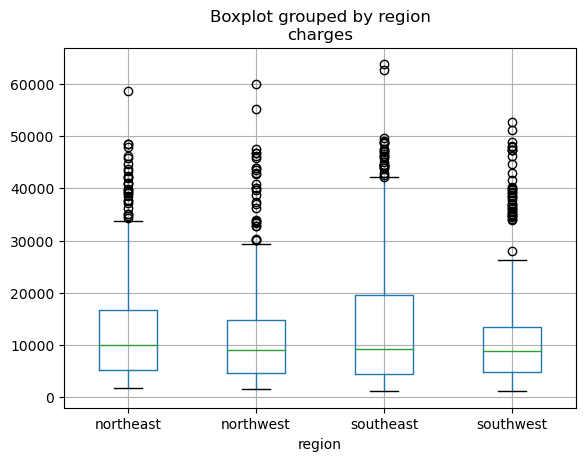

In [54]:
# Analysing relation between region and charges column using box plot
# before cleaning the data
df.boxplot(by="region",column="charges")

<AxesSubplot:title={'center':'charges'}, xlabel='region'>

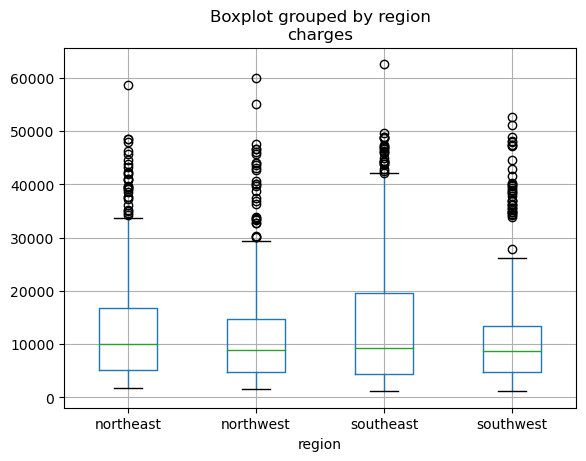

In [55]:
# after cleaning the data
clean_df.boxplot(by="region",column="charges") 

# Insights

- Age: There is a positive correlation between age and charges, indicating that older individuals tend to have higher medical costs.

- Sex: There is no significant difference in charges between males and females.

- BMI: There is no relationship between Bmi and charges.

- Children: The number of children does not have a significant impact on charges.

- Smoker: Smokers have higher medical costs compared to non-smokers.

- Region: There are no clear regional variations in charges.

# conclusions

#### 1.Develop age-based insurance plans: Create insurance plans or premium structures that consider the age of the beneficiaries, as older individuals tend to have higher medical costs. This can help ensure adequate coverage for different age groups.
#### 2.Encourage healthy lifestyles: Implement programs and initiatives to promote healthy lifestyles, specifically targeting individuals with higher BMI values. By incentivizing healthy behaviors, the insurance company can potentially reduce medical costs associated with obesity-related health issues.
#### 3.Provide smoking cessation support: Offer smoking cessation programs and resources to help smokers quit. By reducing the number of smokers among their beneficiaries, the insurance company can potentially lower overall medical costs.
#### 4.Customize family-focused coverage: Develop insurance plans that cater to the healthcare needs of individuals with dependents, considering factors beyond the number of children. This can include coverage for pediatric care, family wellness programs, or maternity-related benefits.
#### 5.Assess regional factors: Although there are no significant regional variations in charges based on the given dataset, it is still valuable for the insurance company to assess local healthcare trends and factors that may impact medical costs. This can help in tailoring coverage plans and provider networks to suit the specific needs of different regions.

# Recommendations

#### 1.Age:
- 1.Develop age-specific insurance plans: Create different insurance plans or premium structures that cater to the healthcare needs of different age groups. This can ensure appropriate coverage and pricing for beneficiaries at different stages of life.
- 2.Provide targeted health screenings: Offer preventive health screenings and check-ups for older individuals to detect and address potential health issues early on, potentially reducing long-term medical costs.
#### 2.BMI:
- 1.Promote wellness programs: Implement wellness programs that focus on healthy eating, exercise, and weight management. These initiatives can help individuals maintain a healthy BMI, reduce the risk of obesity-related conditions, and potentially lower medical costs.
- Offer discounts or rewards: Provide incentives such as premium discounts or rewards for individuals who achieve and maintain a healthy BMI. This can encourage policyholders to actively engage in their health and make positive lifestyle choices.
#### 3.Smoker:
- Offer smoking cessation programs: Develop comprehensive smoking cessation programs that provide support, counseling, and resources for individuals who want to quit smoking. By helping smokers quit, the insurance company can reduce the associated medical costs and improve overall health outcomes
- Implement smoker-specific plans: Consider creating insurance plans tailored specifically for smokers, taking into account the higher medical costs associated with smoking. This can help manage risks and ensure appropriate coverage for this specific group
#### 4.Family-focused coverage:
- Include pediatric and maternity coverage: Design insurance plans that provide comprehensive coverage for pediatric care, including vaccinations, preventive check-ups, and specialized treatments. Additionally, ensure that maternity-related benefits are included to support families during pregnancy and childbirth.
- Collaborate with family wellness programs: Partner with wellness programs that focus on family health and offer discounts or incentives for policyholders to participate. This can encourage families to prioritize their health and well-being, potentially reducing long-term medical costs.
#### 5.Regional considerations:
- Conduct market research: Gain a deeper understanding of regional healthcare trends, preferences, and factors that may impact medical costs. This can inform the development of region-specific insurance plans and provider networks tailored to the needs of each geographic area.
- Collaborate with local healthcare providers: Forge partnerships with local healthcare providers to ensure a wide network of quality healthcare options for beneficiaries in different regions. This can enhance accessibility and affordability of healthcare services.